In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from numpy import pi 
import time
from MaxCutSolver import MaxCutSolver

In [2]:
def get_cost_graph(bitstring, graph):
    cost = 0
    for i, j in graph.edges():
        if bitstring[i] != bitstring[j]:
            cost += 1
    return cost

def get_objective(number_nodes, obj_cost):
    G = nx.generators.classic.complete_graph(number_nodes)
    #G = nx.generators.erdos_renyi_graph(number_nodes, 0.8)
    nx.draw(G, with_labels=True, alpha=0.8, node_size=500)
    best_candidate = ""
    best_cost = 0
    solutions = list()
    for i in range(0,2**number_nodes):
        candidate = "0"*(number_nodes-len(bin(i).replace("0b", "")))+bin(i).replace("0b", "")
        candidate_cost = get_cost_graph(candidate, G)
        if(candidate_cost > best_cost):
            best_candidate = candidate
            best_cost = candidate_cost
        if(candidate_cost == obj_cost):
            solutions.append(best_candidate)
    print(best_candidate, best_cost)
    return G, solutions

In [3]:
def test_n_nodes(number_nodes,objective, G, solutions):
    gradient_values_nm_p = list()
    gradient_values_cobyla_p = list()
    gradient_values_slsqp_p = list()
    swarm_values_p = list()
    bats_values_p = list()
    ants_values_p = list() 
    bees_values_p = list()
    gradient_values_nm = list()
    gradient_values_cobyla = list()
    gradient_values_slsqp = list()
    swarm_values = list()
    bats_values = list()
    ants_values = list()
    bees_values = list()
    gradient_time_nm = list()
    gradient_time_cobyla = list()
    gradient_time_slsqp = list()
    swarm_time = list()
    bats_time = list()
    ants_time = list()
    bees_time = list()
    gradient_solutions_nm = list()
    gradient_solutions_cobyla = list()
    gradient_solutions_slsqp = list()
    swarm_solutions = list()
    bats_solutions = list()
    ants_solutions = list()
    bees_solutions = list()
    p_range = 8
    for i in range(1, p_range):
        myanzats = MaxCutSolver(graph=G, num_qubits=number_nodes, backend='statevector_simulator', p=i)
        start_time = time.time()
        opt_nm = myanzats.optimize_classic(method='Nelder-Mead')
        gradient_dict_nm = myanzats.output_circuit(opt_nm.x)
        gradient_time_nm.append(time.time() - start_time)
        start_time = time.time()
        opt_cobyla = myanzats.optimize_classic(method='COBYLA')
        gradient_dict_cobyla = myanzats.output_circuit(opt_cobyla.x)
        gradient_time_cobyla.append(time.time() - start_time)
        start_time = time.time()
        opt_slsqp = myanzats.optimize_classic(method='SLSQP')
        gradient_dict_slsqp = myanzats.output_circuit(opt_slsqp.x)
        gradient_time_slsqp.append(time.time() - start_time)
        start_time = time.time()
        swarm_dict = myanzats.output_circuit(myanzats.optimize_swarm([0,pi]))
        swarm_time.append(time.time() - start_time)
        start_time = time.time()
        bats_dict = myanzats.output_circuit(myanzats.optimize_bats([0,pi]))
        bats_time.append(time.time() - start_time)
        start_time = time.time()
        opt_ants,iter_ants = myanzats.optimize_ants([0,pi])
        ants_dict = myanzats.output_circuit(opt_ants)
        ants_time.append(time.time() - start_time)

        start_time = time.time()
        opt_bees = myanzats.optimize_bees([0,2*pi])
        bees_dict = myanzats.output_circuit(opt_bees)
        bees_time.append(time.time() - start_time)

        bats_values_p.append(bats_dict[objective]/max(bats_dict.values()))
        swarm_values_p.append(swarm_dict[objective]/max(swarm_dict.values()))
        gradient_values_nm_p.append(gradient_dict_nm[objective]/max(gradient_dict_nm.values()))
        gradient_values_cobyla_p.append(gradient_dict_cobyla[objective]/max(gradient_dict_cobyla.values()))
        gradient_values_slsqp_p.append(gradient_dict_slsqp[objective]/max(gradient_dict_slsqp.values()))
        ants_values_p.append(ants_dict[objective]/max(ants_dict.values()))
        bees_values_p.append(bees_dict[objective]/max(bees_dict.values()))
        bats_values.append(bats_dict[objective])
        swarm_values.append(swarm_dict[objective])
        gradient_values_nm.append(gradient_dict_nm[objective])
        gradient_values_cobyla.append(gradient_dict_cobyla[objective])
        gradient_values_slsqp.append(gradient_dict_slsqp[objective])
        ants_values.append(ants_dict[objective])
        bees_values.append(bees_dict[objective])

        sum_sol_nm = 0
        sum_sol_cobyla =0
        sum_sol_slsqp =0
        sum_sol_swarm =0
        sum_sol_bats =0
        sum_sol_ants =0
        sum_sol_bees =0

        for sol in solutions:
            sum_sol_nm += 0 if not sol in gradient_dict_nm else gradient_dict_nm[sol]  
            sum_sol_cobyla += 0 if not sol in gradient_dict_cobyla else gradient_dict_cobyla[sol]
            sum_sol_slsqp += 0 if not sol in gradient_dict_slsqp else gradient_dict_slsqp[sol]
            sum_sol_swarm += 0 if not sol in swarm_dict else swarm_dict[sol] 
            sum_sol_bats += 0 if not sol in bats_dict else bats_dict[sol] 
            sum_sol_ants += 0 if not sol in ants_dict else ants_dict[sol]
            sum_sol_bees += 0 if not sol in bees_dict else bees_dict[sol]

        bats_solutions.append(sum_sol_bats)
        swarm_solutions.append(sum_sol_swarm)
        gradient_solutions_nm.append(sum_sol_nm)
        gradient_solutions_cobyla.append(sum_sol_cobyla)
        gradient_solutions_slsqp.append(sum_sol_slsqp)
        ants_solutions.append(sum_sol_ants)
        bees_solutions.append(sum_sol_bees)


    print("\n")


    print("gradient_sum_nm="+str(gradient_solutions_nm))
    print("gradient_sum_cobyla="+str(gradient_solutions_cobyla))
    print("gradient_sum_slsqp="+str(gradient_solutions_slsqp))
    print("swarm_sum"+str(swarm_solutions))
    print("bats_sum="+str(bats_solutions))
    print("ants_sum="+str(ants_solutions))
    print("bees_sum="+str(bees_solutions))


    plt.plot(list(range(1,p_range)), gradient_solutions_nm, '-o')
    plt.plot(list(range(1,p_range)), gradient_solutions_cobyla, '-o')
    plt.plot(list(range(1,p_range)), gradient_solutions_slsqp, '-o')
    plt.plot(list(range(1,p_range)), swarm_solutions, '-o')
    plt.plot(list(range(1,p_range)), bats_solutions, '-o')
    plt.plot(list(range(1,p_range)), ants_solutions, '-o')
    plt.plot(list(range(1,p_range)), bees_solutions, '-o')
    plt.legend(["Nelder-Mead", "COBYLA", "SLSQP", "PSO", "BA", "ACO", "ABC"])
    plt.title("P value vs probability of getting a correct solution on Statevector simulator")
    plt.xlabel('p-value', fontsize=18)
    plt.ylabel('probability', fontsize=16)
    plt.show()


    print("gradient_values_nm_p="+str(gradient_values_nm_p))
    print("gradient_values_cobyla_p="+str(gradient_values_cobyla_p))
    print("gradient_values_slsqp_p="+str(gradient_values_slsqp_p))
    print("swarm_values_p"+str(swarm_values_p))
    print("bats_values_p="+str(bats_values_p))
    print("ants_values_p="+str(ants_values_p))
    print("bees_values_p="+str(bees_values_p))


    plt.plot(list(range(1,p_range)), gradient_values_nm_p, '-o')
    plt.plot(list(range(1,p_range)), gradient_values_cobyla_p, '-o')
    plt.plot(list(range(1,p_range)), gradient_values_slsqp_p, '-o')
    plt.plot(list(range(1,p_range)), swarm_values_p, '-o')
    plt.plot(list(range(1,p_range)), bats_values_p, '-o')
    plt.plot(list(range(1,p_range)), ants_values_p, '-o')
    plt.plot(list(range(1,p_range)), bees_values_p, '-o')
    plt.legend(["Nelder-Mead", "COBYLA","SLSQP","PSO", "BA", "ACO", "ABC"])
    plt.title("P value vs approximation ratio on Statevector simulator")
    plt.xlabel('p-value', fontsize=18)
    plt.ylabel('approximation ratio', fontsize=16)
    plt.show()

    print("gradient_values_nm="+str(gradient_values_nm))
    print("gradient_values_cobyla="+str(gradient_values_cobyla))
    print("gradient_values_slsqp="+str(gradient_values_slsqp))
    print("swarm_values="+str(swarm_values))
    print("bats_values="+str(bats_values))
    print("ants_values="+str(ants_values))
    print("bees_values="+str(bees_values))

    plt.plot(list(range(1,p_range)), gradient_values_nm, '-o')
    plt.plot(list(range(1,p_range)), gradient_values_cobyla, '-o')
    plt.plot(list(range(1,p_range)), gradient_values_slsqp, '-o')
    plt.plot(list(range(1,p_range)), swarm_values, '-o')
    plt.plot(list(range(1,p_range)), bats_values, '-o')
    plt.plot(list(range(1,p_range)), ants_values, '-o')
    plt.plot(list(range(1,p_range)), bees_values, '-o')
    plt.legend(["Nelder-Mead", "COBYLA","SLSQP","PSO", "BA", "ACO", "ABC"]) 
    plt.title("P value vs ground state probability on Statevector simulator")
    plt.xlabel('p-value', fontsize=18)
    plt.ylabel('probability', fontsize=16)
    plt.show()

    print( "gradient_time_nm=" +str(gradient_time_nm))
    print( "gradient_time_cobyla=" +str(gradient_time_cobyla))
    print( "gradient_time_slsqp=" +str(gradient_time_slsqp))
    print( "swarm_time=" +str(swarm_time))
    print( "bats_time=" +str(bats_time))
    print( "ants_time=" +str(ants_time))
    print( "bees_time=" +str(bees_time))

    plt.plot(list(range(1,p_range)), gradient_time_nm, '-o')
    plt.plot(list(range(1,p_range)), gradient_time_cobyla, '-o')
    plt.plot(list(range(1,p_range)), gradient_time_slsqp, '-o')
    plt.plot(list(range(1,p_range)), swarm_time, '-o')
    plt.plot(list(range(1,p_range)), bats_time, '-o')
    plt.plot(list(range(1,p_range)), ants_time, '-o')
    plt.plot(list(range(1,p_range)), bees_time, '-o')
    plt.legend(["Nelder-Mead", "COBYLA","SLSQP","PSO", "BA", "ACO", "ABC"])
    plt.title("P value vs execution time on Statevector simulator")
    plt.xlabel('p-value', fontsize=18)
    plt.ylabel('execution time', fontsize=16)
    plt.show()

# 4 nodes graph

0011 4


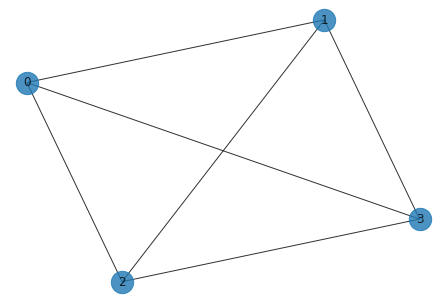

In [4]:
G, solutions = get_objective(4, 4)



gradient_sum_nm=[0.7391225351861299, 0.9999999951616811, 0.999999996502267, 0.9999999993460904, 0.9999999948647696, 0.9999999852337847, 0.9999999919323364]
gradient_sum_cobyla=[0.7391883644643664, 0.9999744411780829, 0.9999999352397901, 0.9999989270330699, 0.9999995900317465, 0.9999988488093192, 0.9999998831515591]
gradient_sum_slsqp=[0.7391089087608816, 0.9999999819768622, 0.9999996818598854, 0.999999713139942, 0.9999999668966175, 0.9999999864437676, 0.9999999999831873]
swarm_sum[0.7382007915705651, 0.9582017571157166, 0.9003488808942824, 0.9507732832910388, 0.9686374730312494, 0.9871619231525143, 0.9799969767929467]
bats_sum=[0.8170529176031299, 0.8088677506511244, 0.9390311701995591, 0.9289209134471605, 0.9172455785832359, 0.86048949515974, 0.5155816199326004]
ants_sum=[0.6969379546076524, 0.9627470655762409, 0.8703367558415251, 0.9660049673009861, 0.9441237972518415, 0.9386724618210706, 0.923383613598607]
bees_sum=[0.7944429256337032, 0.9446720407954452, 0.9447931219413319, 0.962

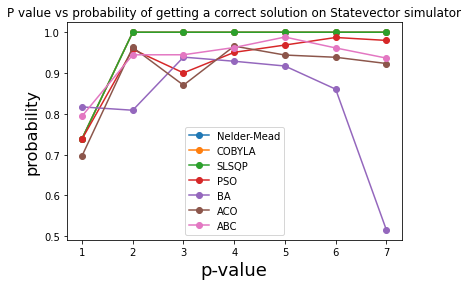

gradient_values_nm_p=[1.0, 1.0, 0.999999999999999, 0.9999999999999998, 1.0, 0.9999999999999987, 0.9999999999999988]
gradient_values_cobyla_p=[1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 0.9999999999999991, 0.9999999999999994]
gradient_values_slsqp_p=[1.0, 0.9999999999999997, 0.9999999999999998, 0.9999999999999997, 1.0, 1.0, 1.0]
swarm_values_p[1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 0.9999999999999987]
bats_values_p=[0.9999999999999998, 0.9999999999999998, 0.9999999999999997, 1.0, 1.0, 1.0, 0.9999999999999992]
ants_values_p=[0.9999999999999997, 0.9999999999999994, 1.0, 0.9999999999999997, 0.9999999999999997, 0.9999999999999994, 0.9999999999999998]
bees_values_p=[1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0]


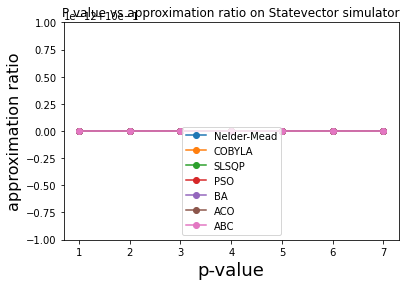

gradient_values_nm=[0.12318708919768832, 0.16666666586028017, 0.16666666608371117, 0.16666666655768175, 0.16666666581079495, 0.16666666420563078, 0.16666666532205604]
gradient_values_cobyla=[0.12319806074406109, 0.1666624068630138, 0.16666665587329837, 0.166666487838845, 0.16666659833862443, 0.16666647480155322, 0.16666664719192653]
gradient_values_slsqp=[0.1231848181268136, 0.16666666366281038, 0.16666661364331423, 0.16666661885665698, 0.16666666114943623, 0.1666666644072946, 0.16666666666386457]
swarm_values=[0.12303346526176084, 0.15970029285261944, 0.15005814681571375, 0.15846221388183981, 0.16143957883854157, 0.16452698719208572, 0.16333282946549113]
bats_values=[0.1361754862671883, 0.13481129177518741, 0.15650519503325983, 0.15482015224119344, 0.15287426309720598, 0.14341491585995667, 0.08593026998876674]
ants_values=[0.11615632576794205, 0.16045784426270682, 0.14505612597358752, 0.16100082788349768, 0.15735396620864023, 0.15644541030351175, 0.15389726893310116]
bees_values=[0.13

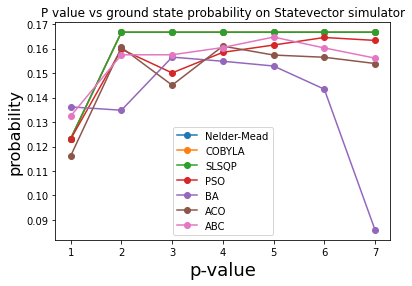

gradient_time_nm=[0.40146589279174805, 1.1207759380340576, 1.5502572059631348, 2.6629631519317627, 2.573096990585327, 3.2052061557769775, 4.291508197784424]
gradient_time_cobyla=[0.08127498626708984, 2.8650245666503906, 0.661405086517334, 3.4857215881347656, 1.9904887676239014, 3.1254260540008545, 2.1478700637817383]
gradient_time_slsqp=[0.08967828750610352, 0.21123147010803223, 0.43741822242736816, 0.7537193298339844, 1.225437879562378, 1.4986939430236816, 2.1536264419555664]
swarm_time=[2.8648738861083984, 3.946573495864868, 5.112936735153198, 5.837124347686768, 7.586275815963745, 8.71659541130066, 9.363775968551636]
bats_time=[7.809446573257446, 10.88956332206726, 14.613442420959473, 16.56089997291565, 22.067526817321777, 24.431902408599854, 26.99713158607483]
ants_time=[3.4841883182525635, 4.767354488372803, 6.8486926555633545, 7.763607978820801, 10.203020095825195, 10.965807437896729, 12.420780658721924]
bees_time=[6.284204721450806, 8.6363844871521, 11.918891668319702, 14.2461948

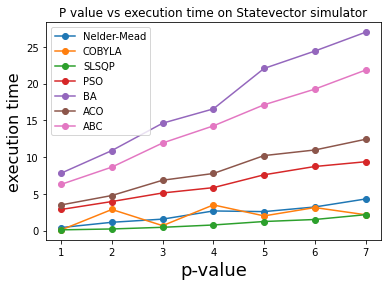

In [5]:
test_n_nodes(4,'0011', G, solutions) 

# 5 nodes graph

00011 6


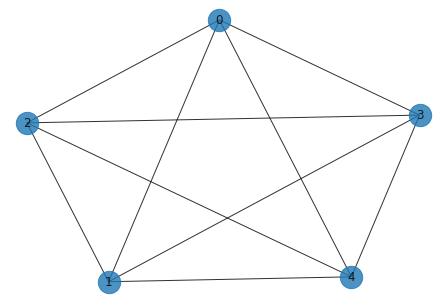

In [6]:
G, solutions = get_objective(5, 6)



gradient_sum_nm=[0.9759014242564914, 0.9999999953407012, 0.9999999983215256, 0.9999999953990275, 0.9999999973819912, 0.9999999722800839, 0.9999999827104439]
gradient_sum_cobyla=[0.9759494167427587, 0.9999990546957193, 0.9999998480571654, 0.9999996938593764, 0.9999990084918016, 0.999999309712582, 0.9999994552875596]
gradient_sum_slsqp=[0.9759193629748103, 0.9999999785161817, 0.999999970939724, 0.9999999800766314, 0.9999999625453375, 0.9999999988651148, 0.9999999171126844]
swarm_sum[0.9727798967192224, 0.9901030444079978, 0.9920126040376378, 0.9618762984576296, 0.9669178073100121, 0.9978117053404124, 0.977618773409648]
bats_sum=[0.968481671039207, 0.9307396107664002, 0.8991495687183738, 0.8640498333824836, 0.8986754771722122, 0.8925908782112374, 0.5958487076933681]
ants_sum=[0.884075756498308, 0.9130310999222059, 0.9001123231309083, 0.819220307233836, 0.9429678514330586, 0.837740538472891, 0.9254811799860986]
bees_sum=[0.9497873866865741, 0.9262061628435853, 0.9436201532076359, 0.95792

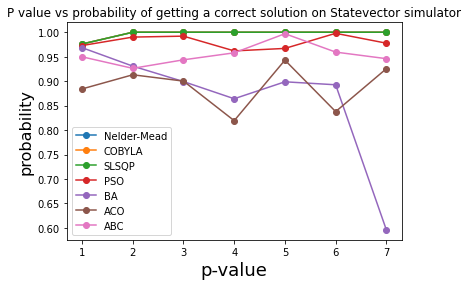

gradient_values_nm_p=[0.999999999999999, 0.9999999999999991, 1.0, 1.0, 0.9999999999999986, 0.9999999999999984, 0.9999999999999999]
gradient_values_cobyla_p=[1.0, 0.9999999999999988, 0.999999999999999, 0.999999999999999, 0.9999999999999996, 0.9999999999999988, 1.0]
gradient_values_slsqp_p=[0.9999999999999991, 0.9999999999999989, 0.9999999999999999, 0.9999999999999989, 0.9999999999999996, 0.9999999999999957, 0.9999999999999988]
swarm_values_p[0.9999999999999994, 1.0, 1.0, 0.9999999999999991, 0.9999999999999991, 0.9999999999999972, 0.999999999999998]
bats_values_p=[0.999999999999999, 0.9999999999999986, 0.9999999999999984, 0.9999999999999996, 0.9999999999999981, 0.9999999999999992, 0.7592710550725169]
ants_values_p=[0.9999999999999999, 1.0, 0.9999999999999989, 0.9999999999999998, 0.999999999999999, 0.9999999999999999, 0.9999999999999996]
bees_values_p=[0.9999999999999991, 1.0, 0.9999999999999997, 0.9999999999999981, 0.999999999999999, 0.999999999999999, 0.9999999999999994]


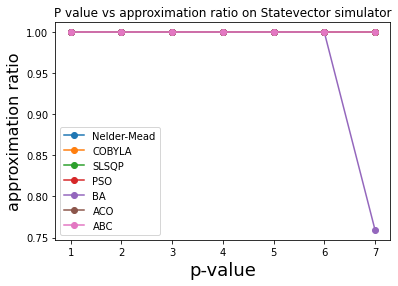

gradient_values_nm=[0.04879507121282459, 0.04999999976703506, 0.04999999991607628, 0.04999999976995136, 0.04999999986909957, 0.049999998614004205, 0.04999999913552218]
gradient_values_cobyla=[0.04879747083713795, 0.04999995273478596, 0.04999999240285829, 0.0499999846929688, 0.0499999504245901, 0.04999996548562908, 0.049999972764377995]
gradient_values_slsqp=[0.0487959681487405, 0.049999998925809086, 0.04999999854698619, 0.04999999900383158, 0.04999999812726689, 0.04999999994325572, 0.04999999585563424]
swarm_values=[0.048638994835961104, 0.0495051522203999, 0.04960063020188191, 0.04809381492288149, 0.04834589036550059, 0.04989058526702062, 0.04888093867048241]
bats_values=[0.04842408355196034, 0.046536980538320026, 0.044957478435918706, 0.0432024916691242, 0.044933773858610596, 0.044629543910561884, 0.029792435384668407]
ants_values=[0.04420378782491539, 0.04565155499611031, 0.045005616156545414, 0.040961015361691784, 0.04714839257165293, 0.04188702692364456, 0.046274058999304944]
bees

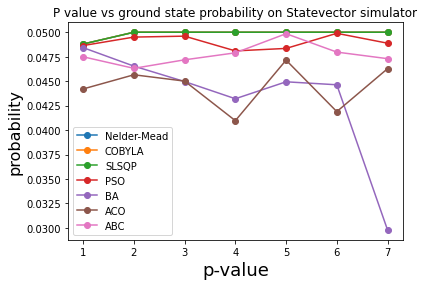

gradient_time_nm=[0.28574180603027344, 2.488886833190918, 2.6314992904663086, 2.408320903778076, 5.387091159820557, 4.369760036468506, 6.106361389160156]
gradient_time_cobyla=[0.1080479621887207, 1.1749224662780762, 1.2995500564575195, 2.4011762142181396, 3.860183000564575, 2.1547136306762695, 2.472015857696533]
gradient_time_slsqp=[0.09359550476074219, 0.3768460750579834, 0.7858138084411621, 1.286069393157959, 1.9702045917510986, 1.7531583309173584, 2.9725501537323]
swarm_time=[3.204883098602295, 4.933557033538818, 6.854890584945679, 9.156238317489624, 10.261349201202393, 12.381289958953857, 13.824893712997437]
bats_time=[9.220473051071167, 13.952210664749146, 19.77882480621338, 25.55629849433899, 29.570156574249268, 34.78412652015686, 40.02712297439575]
ants_time=[4.141891717910767, 6.494151592254639, 8.985519647598267, 11.489837884902954, 13.434602499008179, 16.134532690048218, 18.27627468109131]
bees_time=[7.477872371673584, 11.89972186088562, 15.912128210067749, 20.15556263923645,

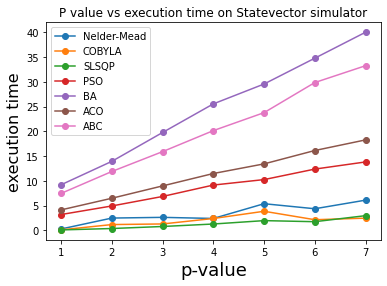

In [7]:
test_n_nodes(5,'00011', G, solutions)

# 6 nodes graph

000111 9


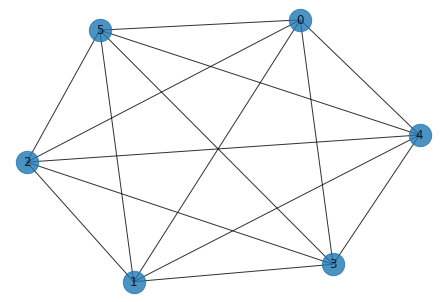

In [8]:
G, solutions = get_objective(6, 9)



gradient_sum_nm=[0.6713265328802425, 0.8941645790564954, 0.9999999986684099, 0.9999999999883685, 0.9999999976284423, 0.9999999992302901, 0.9999999949066991]
gradient_sum_cobyla=[0.671495467368828, 0.7912632935592301, 0.9996770354984583, 0.9999456506035089, 0.9999697888209336, 0.9998395823600241, 0.9999883379820097]
gradient_sum_slsqp=[0.6713153081606907, 0.7659118638882118, 0.9999696443071725, 0.9999999472057857, 0.9999999881607226, 0.999999987912623, 0.9999999933469471]
swarm_sum[0.6649073906915856, 0.6922812342226108, 0.8794667731934183, 0.8568900995936967, 0.8901453719569469, 0.8350043040742865, 0.866116642609997]
bats_sum=[0.5682301308807706, 0.868234823335232, 0.8328642630430827, 0.9285718820925875, 0.6190108713855156, 0.8464132347279272, 0.9466239622133645]
ants_sum=[0.534592554695703, 0.9158801128536641, 0.6633704371634915, 0.9087050238178574, 0.8275107068739856, 0.9568975910412302, 0.8725043271946363]
bees_sum=[0.6718771714549547, 0.9007616455359241, 0.8473755219994408, 0.951

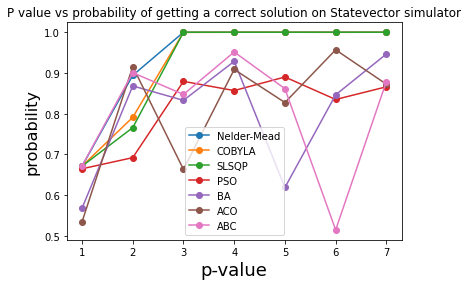

gradient_values_nm_p=[1.0, 0.9999999999999984, 0.9999999999999997, 0.9999999999999984, 1.0, 0.9999999999999994, 0.9999999999999983]
gradient_values_cobyla_p=[1.0, 1.0, 0.9999999999999982, 0.999999999999999, 0.9999999999999988, 0.9999999999999997, 0.9999999999999994]
gradient_values_slsqp_p=[0.9999999999999998, 0.9999999999999988, 0.9999999999999997, 0.9999999999999986, 0.9999999999999988, 0.9999999999999988, 0.9999999999999982]
swarm_values_p[1.0, 0.9999999999999996, 0.999999999999999, 0.9999999999999992, 0.9999999999999992, 0.9999999999999992, 0.9999999999999996]
bats_values_p=[1.0, 1.0, 0.9999999999999987, 0.9999999999999987, 1.0, 1.0, 1.0]
ants_values_p=[1.0, 0.9999999999999994, 0.9999999999999998, 0.9999999999999993, 0.9999999999999994, 0.9999999999999992, 0.9999999999999982]
bees_values_p=[0.9999999999999998, 0.9999999999999993, 0.9999999999999986, 0.9999999999999996, 0.9999999999999993, 0.9999999999999993, 0.9999999999999988]


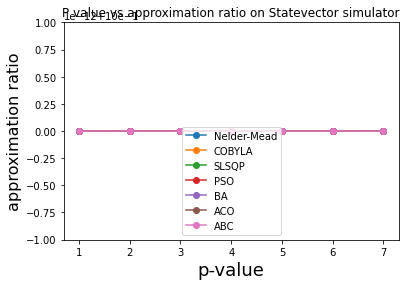

gradient_values_nm=[0.03356632664401212, 0.04470822895282475, 0.049999999933420476, 0.04999999999941844, 0.0499999998814221, 0.049999999961514524, 0.04999999974533494]
gradient_values_cobyla=[0.03357477336844142, 0.039563164677961504, 0.0499838517749229, 0.04999728253017546, 0.04999848944104668, 0.049991979118001184, 0.04999941689910049]
gradient_values_slsqp=[0.03356576540803453, 0.038295593194410595, 0.04999848221535861, 0.049999997360289296, 0.04999999940803613, 0.04999999939563114, 0.04999999966734735]
swarm_values=[0.03324536953457928, 0.03461406171113054, 0.04397333865967093, 0.042844504979684825, 0.04450726859784734, 0.0417502152037143, 0.04330583213049983]
bats_values=[0.028411506544038536, 0.043411741166761594, 0.041643213152154135, 0.04642859410462935, 0.030950543569275776, 0.04232066173639634, 0.04733119811066824]
ants_values=[0.02672962773478514, 0.0457940056426832, 0.03316852185817458, 0.04543525119089288, 0.041375535343699275, 0.047844879552061494, 0.0436252163597318]
bee

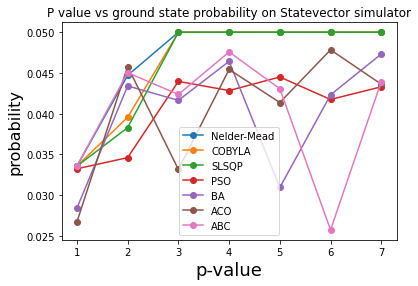

gradient_time_nm=[0.3860154151916504, 1.4969933032989502, 8.510256290435791, 16.239733934402466, 11.086718082427979, 19.318808555603027, 13.436964511871338]
gradient_time_cobyla=[0.1721358299255371, 6.981890439987183, 6.067790746688843, 10.079493999481201, 14.332695245742798, 17.213858366012573, 8.471036911010742]
gradient_time_slsqp=[0.16322755813598633, 0.6452553272247314, 2.369680881500244, 3.4528658390045166, 3.740018367767334, 6.618887186050415, 7.151821851730347]
swarm_time=[4.647554874420166, 7.028778314590454, 9.509991645812988, 11.993786573410034, 14.427854061126709, 17.293362617492676, 20.542073011398315]
bats_time=[13.353137254714966, 20.367995023727417, 29.571714162826538, 34.58168125152588, 42.13672590255737, 50.747817277908325, 57.679988384246826]
ants_time=[6.032189846038818, 9.38952922821045, 13.312390327453613, 15.784989595413208, 20.982690811157227, 23.41619896888733, 26.237024784088135]
bees_time=[11.402186393737793, 16.435216188430786, 22.87263321876526, 27.71270132

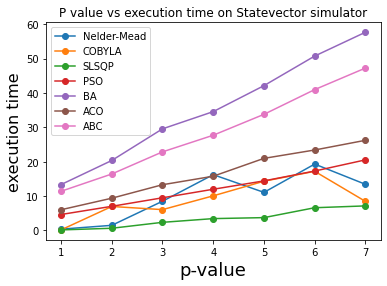

In [9]:
test_n_nodes(6,'000111', G, solutions)

# 7 nodes graph

0000111 12


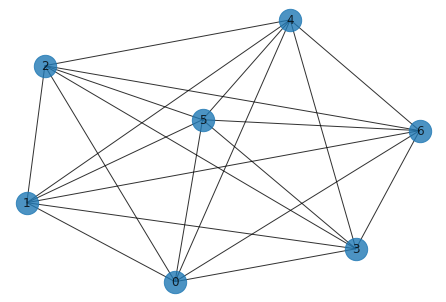

In [4]:
G, solutions = get_objective(7, 12)



gradient_sum_nm=[0.951356433555898, 0.5468755235810487, 0.9974040291899963, 0.9999999966762867, 0.9999999938215971, 0.9999999993207153, 0.9999999798152155]
gradient_sum_cobyla=[0.9514606900371113, 0.9986963079435641, 0.9996108240445007, 0.9989617918291276, 0.9999881666512938, 0.9999588055931412, 0.9998454879921799]
gradient_sum_slsqp=[0.9513070572777221, 0.9950423625074505, 0.9999999694514835, 0.999999997024718, 0.9999999388510138, 0.9999999998572716, 0.9999999966042832]
swarm_sum[0.954857778044887, 0.9709011932118937, 0.9681338835274964, 0.8897107953718043, 0.9139795992549465, 0.9136887230245849, 0.8733949861757533]
bats_sum=[0.9618634974948219, 0.9199775785727846, 0.7736613801422612, 0.32841946923808346, 0.80936523582469, 0.8590914645339099, 0.9578840600995479]
ants_sum=[0.9596064525490979, 0.8787993580844932, 0.8327878804588429, 0.8951424923100919, 0.7218349571468156, 0.8797326396895483, 0.8957790997701854]
bees_sum=[0.9662258485478568, 0.965715233479068, 0.9594545335497061, 0.834

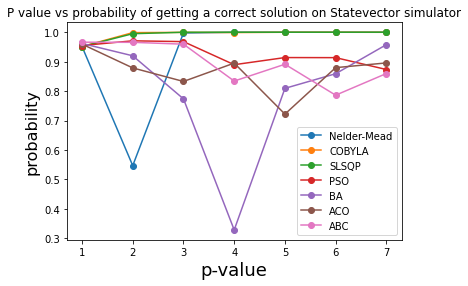

gradient_values_nm_p=[0.9999999999999994, 0.999996186698867, 0.999999999999999, 0.999999999999997, 0.9999999999999979, 0.9999999999999988, 0.9999999999999978]
gradient_values_cobyla_p=[0.9999999999999991, 0.9999999999999979, 0.9999999999999958, 0.9999999999999982, 0.9999999999999969, 0.999999999999997, 0.9999999999999964]
gradient_values_slsqp_p=[0.9999999999999989, 0.9999999999999991, 1.0, 0.9999999999999979, 0.9999999999999983, 0.9999999999999972, 0.9999999999999977]
swarm_values_p[0.9999999999999993, 0.9999999999999978, 0.9999999999999988, 0.9999999999999984, 0.9999999999999988, 0.9999999999999974, 0.9999999999999974]
bats_values_p=[0.9999999999999984, 1.0, 0.9999999999999988, 0.3255688850975736, 0.9054267866459241, 0.2668799984268102, 0.999999999999999]
ants_values_p=[0.9999999999999998, 0.9999999999999993, 0.999999999999998, 0.4643904688128165, 0.7615403088112976, 0.9999999999999972, 0.5946152037638156]
bees_values_p=[0.9999999999999988, 0.9999999999999987, 0.9999999999999977, 0.9

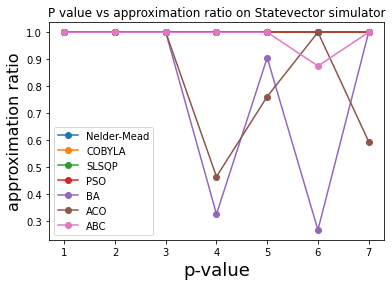

gradient_values_nm=[0.013590806193655667, 0.007812507479729254, 0.014248628988428543, 0.014285714238232683, 0.014285714197451376, 0.014285714276010211, 0.014285713997360202]
gradient_values_cobyla=[0.013592295571958728, 0.01426709011347949, 0.014280154629207138, 0.014270882740416126, 0.014285545237875634, 0.01428512579418774, 0.01428350697131684]
gradient_values_slsqp=[0.013590100818253157, 0.014214890892963591, 0.01428571384930693, 0.014285714243210275, 0.014285713412157335, 0.014285714283675305, 0.014285714237204062]
swarm_values=[0.013640825400641236, 0.013870017045884194, 0.013830484050392828, 0.012710154219597206, 0.013056851417927819, 0.013052696043208356, 0.012477071231082179]
bats_values=[0.013740907107068896, 0.013142536836754082, 0.01105230543060372, 0.004691706703401197, 0.0115623605117813, 0.012272735207627287, 0.013684058001422096]
ants_values=[0.013708663607844231, 0.012554276544064212, 0.011896969720840603, 0.012787749890144156, 0.010311927959240233, 0.012567609138422111

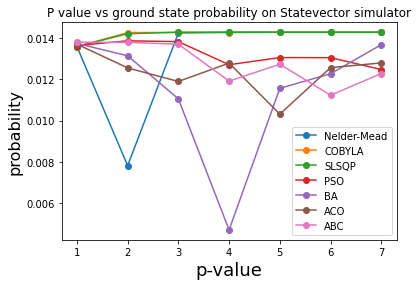

gradient_time_nm=[1.1037702560424805, 1.6654202938079834, 15.366614580154419, 12.841664791107178, 32.737149238586426, 16.63269877433777, 15.704617738723755]
gradient_time_cobyla=[0.2724637985229492, 2.453909397125244, 12.695615768432617, 16.324016332626343, 11.497707843780518, 19.04402470588684, 25.414851903915405]
gradient_time_slsqp=[0.350055456161499, 2.3791916370391846, 7.635260105133057, 3.4106743335723877, 5.493175745010376, 6.765275955200195, 9.640737056732178]
swarm_time=[7.806966781616211, 9.869550704956055, 12.82061505317688, 17.61411428451538, 20.417410135269165, 22.931371212005615, 25.19424819946289]
bats_time=[20.463334798812866, 28.322893381118774, 38.86322593688965, 51.962605714797974, 57.78504419326782, 66.52370500564575, 72.96113753318787]
ants_time=[9.56733250617981, 13.591174125671387, 16.6837797164917, 22.59346604347229, 25.242549180984497, 29.68236494064331, 33.22047424316406]
bees_time=[17.314387559890747, 23.95372223854065, 29.74316143989563, 39.53251314163208, 4

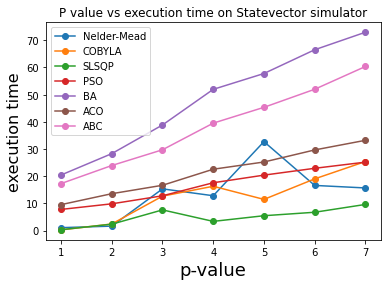

In [5]:
test_n_nodes(7,'0000111', G, solutions)

# 8 nodes graph

00001111 16


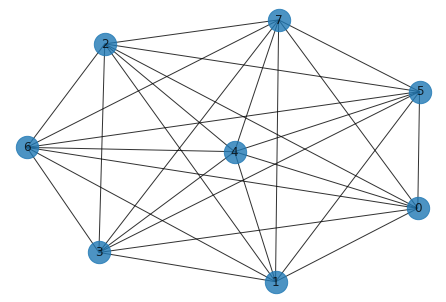

In [4]:
G, solutions = get_objective(8, 16)



gradient_sum_nm=[0.6297482416166668, 0.8688619840156104, 0.8230372608617244, 0.9425419304050623, 0.9632773681853251, 0.9999999484971218, 0.9996158401650019]
gradient_sum_cobyla=[0.6299837789998526, 0.9901474908670411, 0.7787893206875695, 0.997973690092342, 0.999919992725626, 0.9990884675931729, 0.9886485400653204]
gradient_sum_slsqp=[0.6296254904605939, 0.9914824095000278, 0.9462030692319496, 0.999999928961912, 0.9999999674050135, 0.9999999807966805, 0.9999999774876877]
swarm_sum[0.6336718575034681, 0.7052357176699737, 0.8727118281243578, 0.8912097914095067, 0.8798200970238256, 0.76803541945776, 0.7210142499999779]
bats_sum=[0.5501471310228736, 0.4463683975432589, 0.19631198998536736, 0.08748817618185066, 0.7330864957470314, 0.546894594623857, 0.24810597077001106]
ants_sum=[0.5819234465266909, 0.8599585494062539, 0.5823861559327371, 0.681743323363246, 0.2192509087294038, 0.36492714661319875, 0.691268333496879]
bees_sum=[0.6584588392260708, 0.9379651131088971, 0.4717239723499886, 0.32

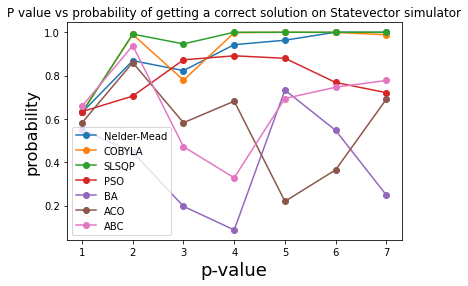

gradient_values_nm_p=[1.0, 0.9999999999999993, 0.9999999999999972, 0.9999999999999991, 0.9999999999999988, 0.9999999999999991, 0.9999999999999998]
gradient_values_cobyla_p=[1.0, 0.9999999999999992, 0.9999999999999991, 0.9999999999999979, 0.9999999999999984, 1.0, 0.9999999999999984]
gradient_values_slsqp_p=[0.9999999999999989, 0.9999999999999987, 0.9999999999999992, 0.9999999999999961, 1.0, 0.9999999999999989, 0.9999999999999979]
swarm_values_p[0.9999999999999998, 0.9999999999999997, 0.9999999999999988, 0.9999999999999983, 0.9999999999999989, 0.9999999999999958, 0.9999999999999991]
bats_values_p=[0.9999999999999996, 0.9999999999999966, 0.40999961417259556, 0.10020934820319038, 0.7621081519596774, 0.9999999999999984, 0.11815881295546661]
ants_values_p=[0.9999999999999993, 0.9999999999999989, 0.9999999999999974, 0.9999999999999961, 0.5102046581618641, 0.968341607853719, 0.33496345435014757]
bees_values_p=[0.9999999999999994, 0.9999999999999991, 0.9999999999999973, 0.8858916405156969, 0.99

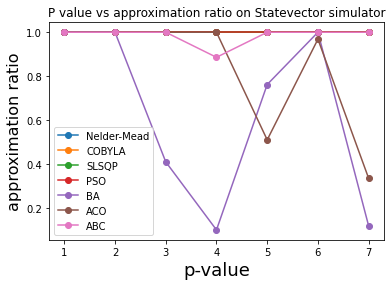

gradient_values_nm=[0.008996403451666664, 0.01241231405736585, 0.011757675155167506, 0.013464884720072304, 0.013761105259790367, 0.01428571354995887, 0.014280226288071447]
gradient_values_cobyla=[0.008999768271426472, 0.014144964155243437, 0.011125561724108127, 0.014256767001319181, 0.014284571324651819, 0.014272692394188205, 0.014123550572361733]
gradient_values_slsqp=[0.008994649863722757, 0.014164034421428941, 0.013517186703313559, 0.014285713270884457, 0.01428571382007164, 0.01428571401138117, 0.014285713964109813]
swarm_values=[0.009052455107192397, 0.010074795966713925, 0.012467311830347955, 0.012731568448707225, 0.01256885852891181, 0.010971934563682291, 0.010300203571428272]
bats_values=[0.007859244728898181, 0.006376691393475121, 0.002804456999790965, 0.001249831088312152, 0.010472664224957575, 0.007812779923197968, 0.0035443710110001536]
ants_values=[0.008313192093238442, 0.012285122134375076, 0.00831980222761053, 0.00973919033376065, 0.003132155838991479, 0.00521324495161712

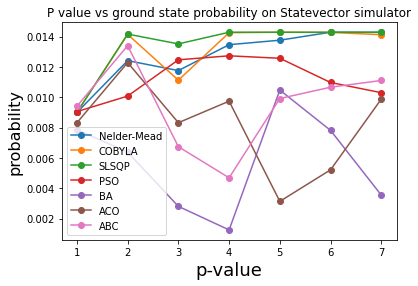

gradient_time_nm=[1.4572114944458008, 4.269882917404175, 24.96696162223816, 21.03547739982605, 59.91658544540405, 88.7940182685852, 114.59117579460144]
gradient_time_cobyla=[0.464824914932251, 11.093936681747437, 21.94628596305847, 25.509936332702637, 18.930002450942993, 37.000062227249146, 40.8342707157135]
gradient_time_slsqp=[0.4721372127532959, 2.0557708740234375, 5.2902514934539795, 21.342413663864136, 10.5617995262146, 16.81107187271118, 24.814844369888306]
swarm_time=[13.284159660339355, 17.281030893325806, 22.61500358581543, 26.237773418426514, 30.780218839645386, 37.536975383758545, 41.53133964538574]
bats_time=[36.973663330078125, 49.80873680114746, 65.3121497631073, 76.2374849319458, 89.57546377182007, 107.40334224700928, 120.08651781082153]
ants_time=[16.512666940689087, 22.55582356452942, 29.271086931228638, 34.38064479827881, 41.05063843727112, 48.59433031082153, 54.31245231628418]
bees_time=[29.136640310287476, 40.00330114364624, 51.794615268707275, 60.64315056800842, 71

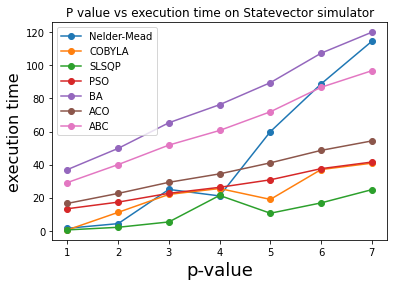

In [5]:
test_n_nodes(8,'00001111', G, solutions)

# 9 nodes graph

000001111 20


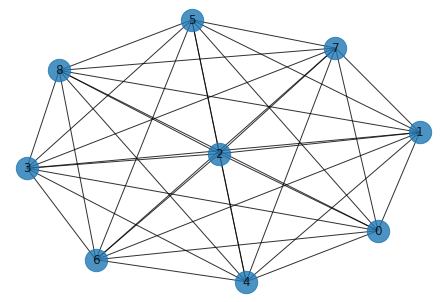

In [6]:
G, solutions = get_objective(9, 20)



gradient_sum_nm=[0.9302959418130006, 0.9320547804429745, 0.967808459413341, 0.9930352958886127, 0.9968065486369231, 0.999732524658675, 0.9999999338638957]
gradient_sum_cobyla=[0.930184543318085, 0.9303387985102618, 0.8366289171385667, 0.9998161287883439, 0.9970918377056651, 0.9899242745727501, 0.9988770362545784]
gradient_sum_slsqp=[0.930275499417287, 0.9302798565870992, 0.9620575654642808, 0.999999895288381, 0.9999999604699705, 0.9999999819429103, 0.9999999986322828]
swarm_sum[0.9169732865550057, 0.9467037118027659, 0.7903029152976376, 0.5494383146764145, 0.8793412033911566, 0.8341295881659202, 0.7411003371803463]
bats_sum=[0.9256213202082739, 0.8510750378262404, 0.7436926536252941, 0.3195170211387973, 0.6790883184843579, 0.6753613332605243, 0.4632783346702126]
ants_sum=[0.7960310343263404, 0.9331876446232293, 0.9789214742221679, 0.6833011247402688, 0.7519602989541805, 0.7251091528873895, 0.6184317505697944]
bees_sum=[0.9050285916272699, 0.9225115657201135, 0.8302378464729244, 0.643

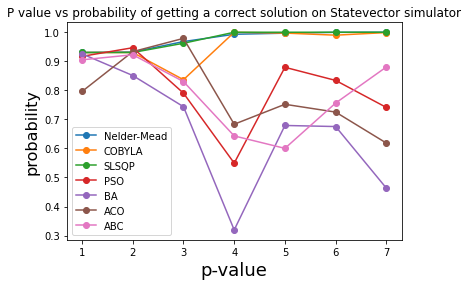

gradient_values_nm_p=[0.9999999999999981, 0.7218766580152776, 0.9999999999999971, 0.9999999999999978, 0.9999999999999987, 0.9999999999999952, 0.9999999999999964]
gradient_values_cobyla_p=[1.0, 0.9999999999999983, 0.9999999999999986, 0.9999999999999969, 0.9999999999999987, 0.9999999999999969, 0.9999999999999952]
gradient_values_slsqp_p=[0.9999999999999989, 0.9999999999999964, 0.9999999999999979, 0.9999999999999973, 0.9999999999999969, 0.9999999999999967, 0.9999999999999996]
swarm_values_p[0.9999999999999997, 0.9999999999999961, 0.9261117636361021, 0.9401077643769721, 0.4929896044671584, 0.4223605419891131, 0.42077840965003477]
bats_values_p=[0.9999999999999986, 0.9999999999999964, 0.9999999999999951, 0.22335005423869408, 0.25684837416644674, 0.5778411718247811, 0.08100227434977637]
ants_values_p=[0.403699453724866, 0.999999999999997, 0.9999999999999966, 0.999999999999999, 0.26011444755710655, 0.9999999999999957, 0.09658292358792242]
bees_values_p=[0.9999999999999986, 0.999999999999999, 

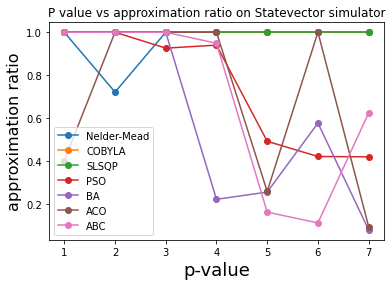

gradient_values_nm=[0.0036916505627499928, 0.0036986300811228975, 0.0038405097595767663, 0.003940616253526223, 0.0039555815422100335, 0.003967192558169327, 0.003968253705809104]
gradient_values_cobyla=[0.003691208505230473, 0.00369182062900899, 0.0033199560203911187, 0.003967524320588665, 0.003956713641689154, 0.0039282709308442465, 0.003963797762914979]
gradient_values_slsqp=[0.0036915694421320797, 0.0036915867324884975, 0.0038176887518423692, 0.003968253552731669, 0.003968253811388782, 0.003968253896598868, 0.0039682539628265266]
swarm_values=[0.0036387828831547933, 0.003756760761122103, 0.0031361226797525467, 0.0021803107725254637, 0.003489449219806163, 0.0033100380482774805, 0.002940874353890272]
bats_values=[0.0036731004770169484, 0.0033772818961358957, 0.0029511613239098793, 0.0012679246870587215, 0.002694794914620472, 0.0026800052907163772, 0.0018384060899611554]
ants_values=[0.003158853310818825, 0.003703125573901683, 0.00388460902469115, 0.0027115123997629702, 0.00298396944029

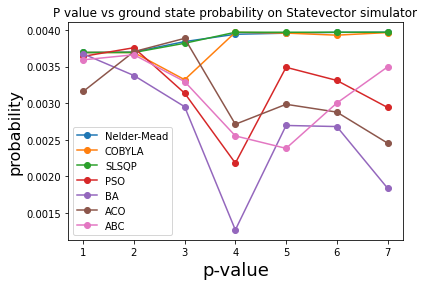

gradient_time_nm=[1.9588205814361572, 5.8381288051605225, 15.797590970993042, 60.71344828605652, 90.57743716239929, 89.11921739578247, 61.083195209503174]
gradient_time_cobyla=[0.7915372848510742, 2.1430718898773193, 33.05724024772644, 37.6304669380188, 40.24394369125366, 50.57634496688843, 56.26615643501282]
gradient_time_slsqp=[0.8255612850189209, 2.1344215869903564, 9.07933521270752, 14.500582218170166, 20.058587074279785, 26.054190635681152, 54.944602966308594]
swarm_time=[21.922957181930542, 27.754669189453125, 33.91014313697815, 39.58159780502319, 45.93653202056885, 51.4508535861969, 54.02892732620239]
bats_time=[63.20321726799011, 78.99207544326782, 99.39104294776917, 114.26383543014526, 134.94948172569275, 149.91564345359802, 149.85822439193726]
ants_time=[28.49452304840088, 35.729886293411255, 44.406659841537476, 53.20362901687622, 57.440709352493286, 67.51351857185364, 68.10142731666565]
bees_time=[50.551663637161255, 63.588533878326416, 80.39243650436401, 91.21398186683655, 

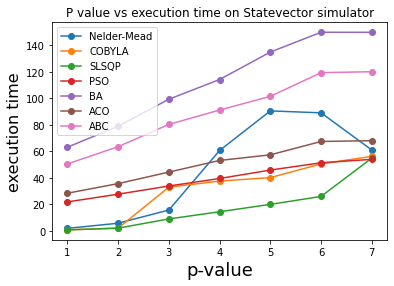

In [7]:
test_n_nodes(9,'000001111', G, solutions)